# 4.0-Level 1 annotation

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-10"

## Introduction

Level 1 annotation of main cell types

In [2]:
timepoint <- "T5"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(ggplot2)
library(dplyr)
}))

## Parameters

In [4]:
#dr_here(show_reason = TRUE)
source(here("SCGRES_99_100/sc_analysis/misc/paths.R"))
source(here("utils/bin.R"))

"{annot}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{annot}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [5]:
# read object
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.rds")))
seurat_obj <- RenameCells(seurat_obj, add.cell.id = "T5_1")

# markers
rna.markers <- read_csv(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.csv")))

Rows: 8977 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
head(seurat_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_org,timepoint,replicate,sample_id,pct_mt,percent.ribo,doublet_score,doublet_pred,S.Score,G2M.Score,Phase,old.ident,RNA_snn_res.0.2,seurat_clusters
,<fct>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>
T5_1_AAACCTGAGGCAGGTT-1,SCGRES_99_100,4127,1707,OS0060_1,T5,1,T5_1,3.028835,18.17301,0.010399281,FALSE,4.160047e-02,0.11031256,G2M,SCGRES_99_100,3,3
T5_1_AAACCTGAGTCGAGTG-1,SCGRES_99_100,5857,2208,OS0060_1,T5,1,T5_1,2.714700,20.59075,0.028801317,FALSE,2.807091e-02,-0.02758888,S,SCGRES_99_100,2,2
T5_1_AAACCTGCACAAGCCC-1,SCGRES_99_100,7340,2571,OS0060_1,T5,1,T5_1,3.269755,21.96185,0.028291621,FALSE,-3.479957e-02,-0.04384339,G1,SCGRES_99_100,0,0
T5_1_AAACCTGGTGCAACGA-1,SCGRES_99_100,6081,2277,OS0060_1,T5,1,T5_1,2.664036,26.83769,0.021544420,FALSE,-4.230144e-02,-0.03576702,G1,SCGRES_99_100,0,0
T5_1_AAACCTGTCAACGAAA-1,SCGRES_99_100,10816,3097,OS0060_1,T5,1,T5_1,2.930843,16.22596,0.047562284,FALSE,-8.020954e-05,-0.02223257,G1,SCGRES_99_100,2,2
T5_1_AAACCTGTCATCTGCC-1,SCGRES_99_100,5784,2296,OS0060_1,T5,1,T5_1,2.472337,19.69225,0.003213368,FALSE,-2.584588e-02,-0.05983870,G1,SCGRES_99_100,3,3


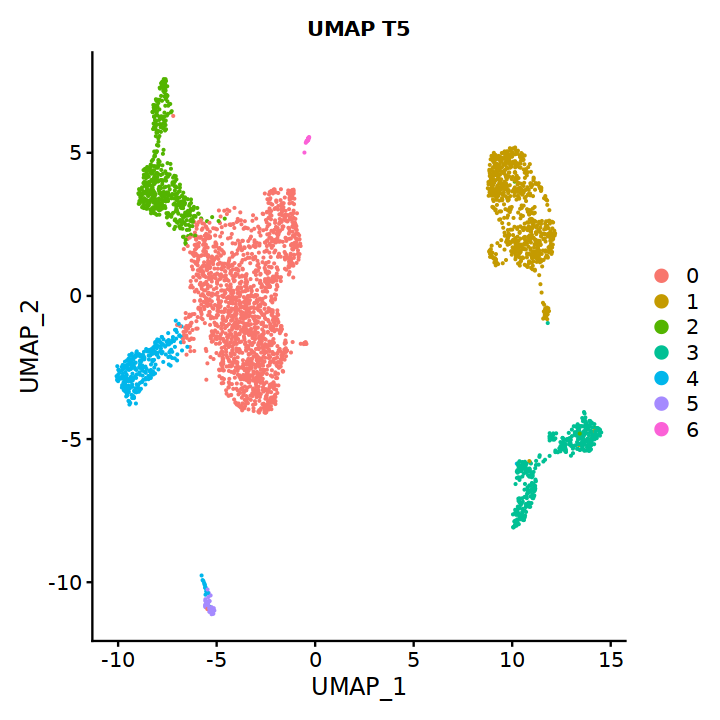

In [7]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

### Check general cell types

Plot specific markers to annotate main cell types

#### T-cells

In [8]:
markers = c("CD3E", "CD3G","CD4","CD8A", "CD8B","ANXA1","GZMK","FOXP3")

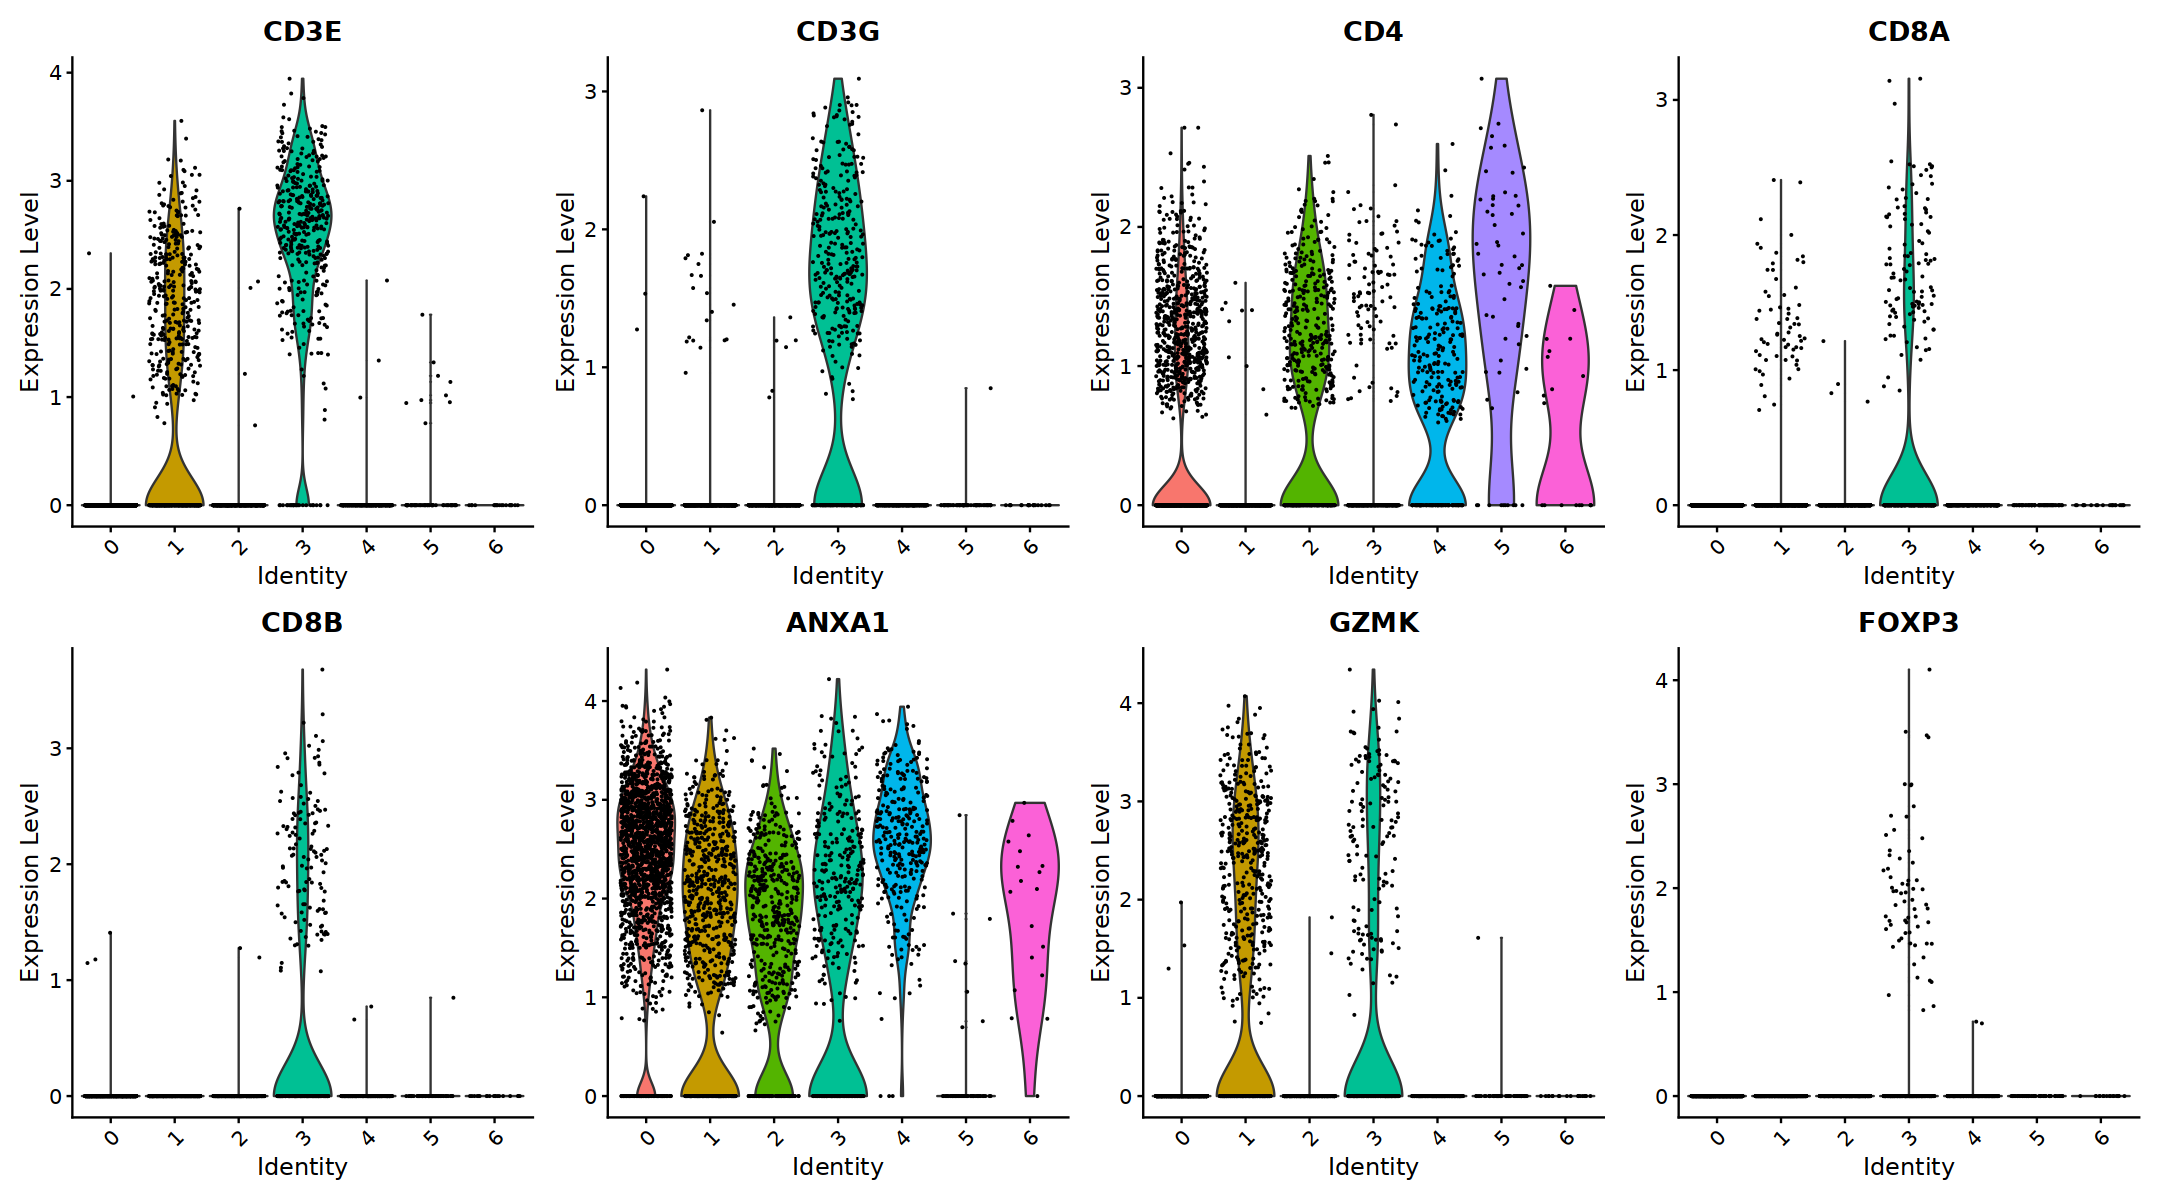

In [9]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

#### Natural Killers

In [10]:
markers = c("NCAM1", "FCGR3A", "CX3CR1", "GNLY", "KLRC2", "KLRD1", "KLRC3", "KLRK1", "KLRC1", "GNLY", "NKG7")

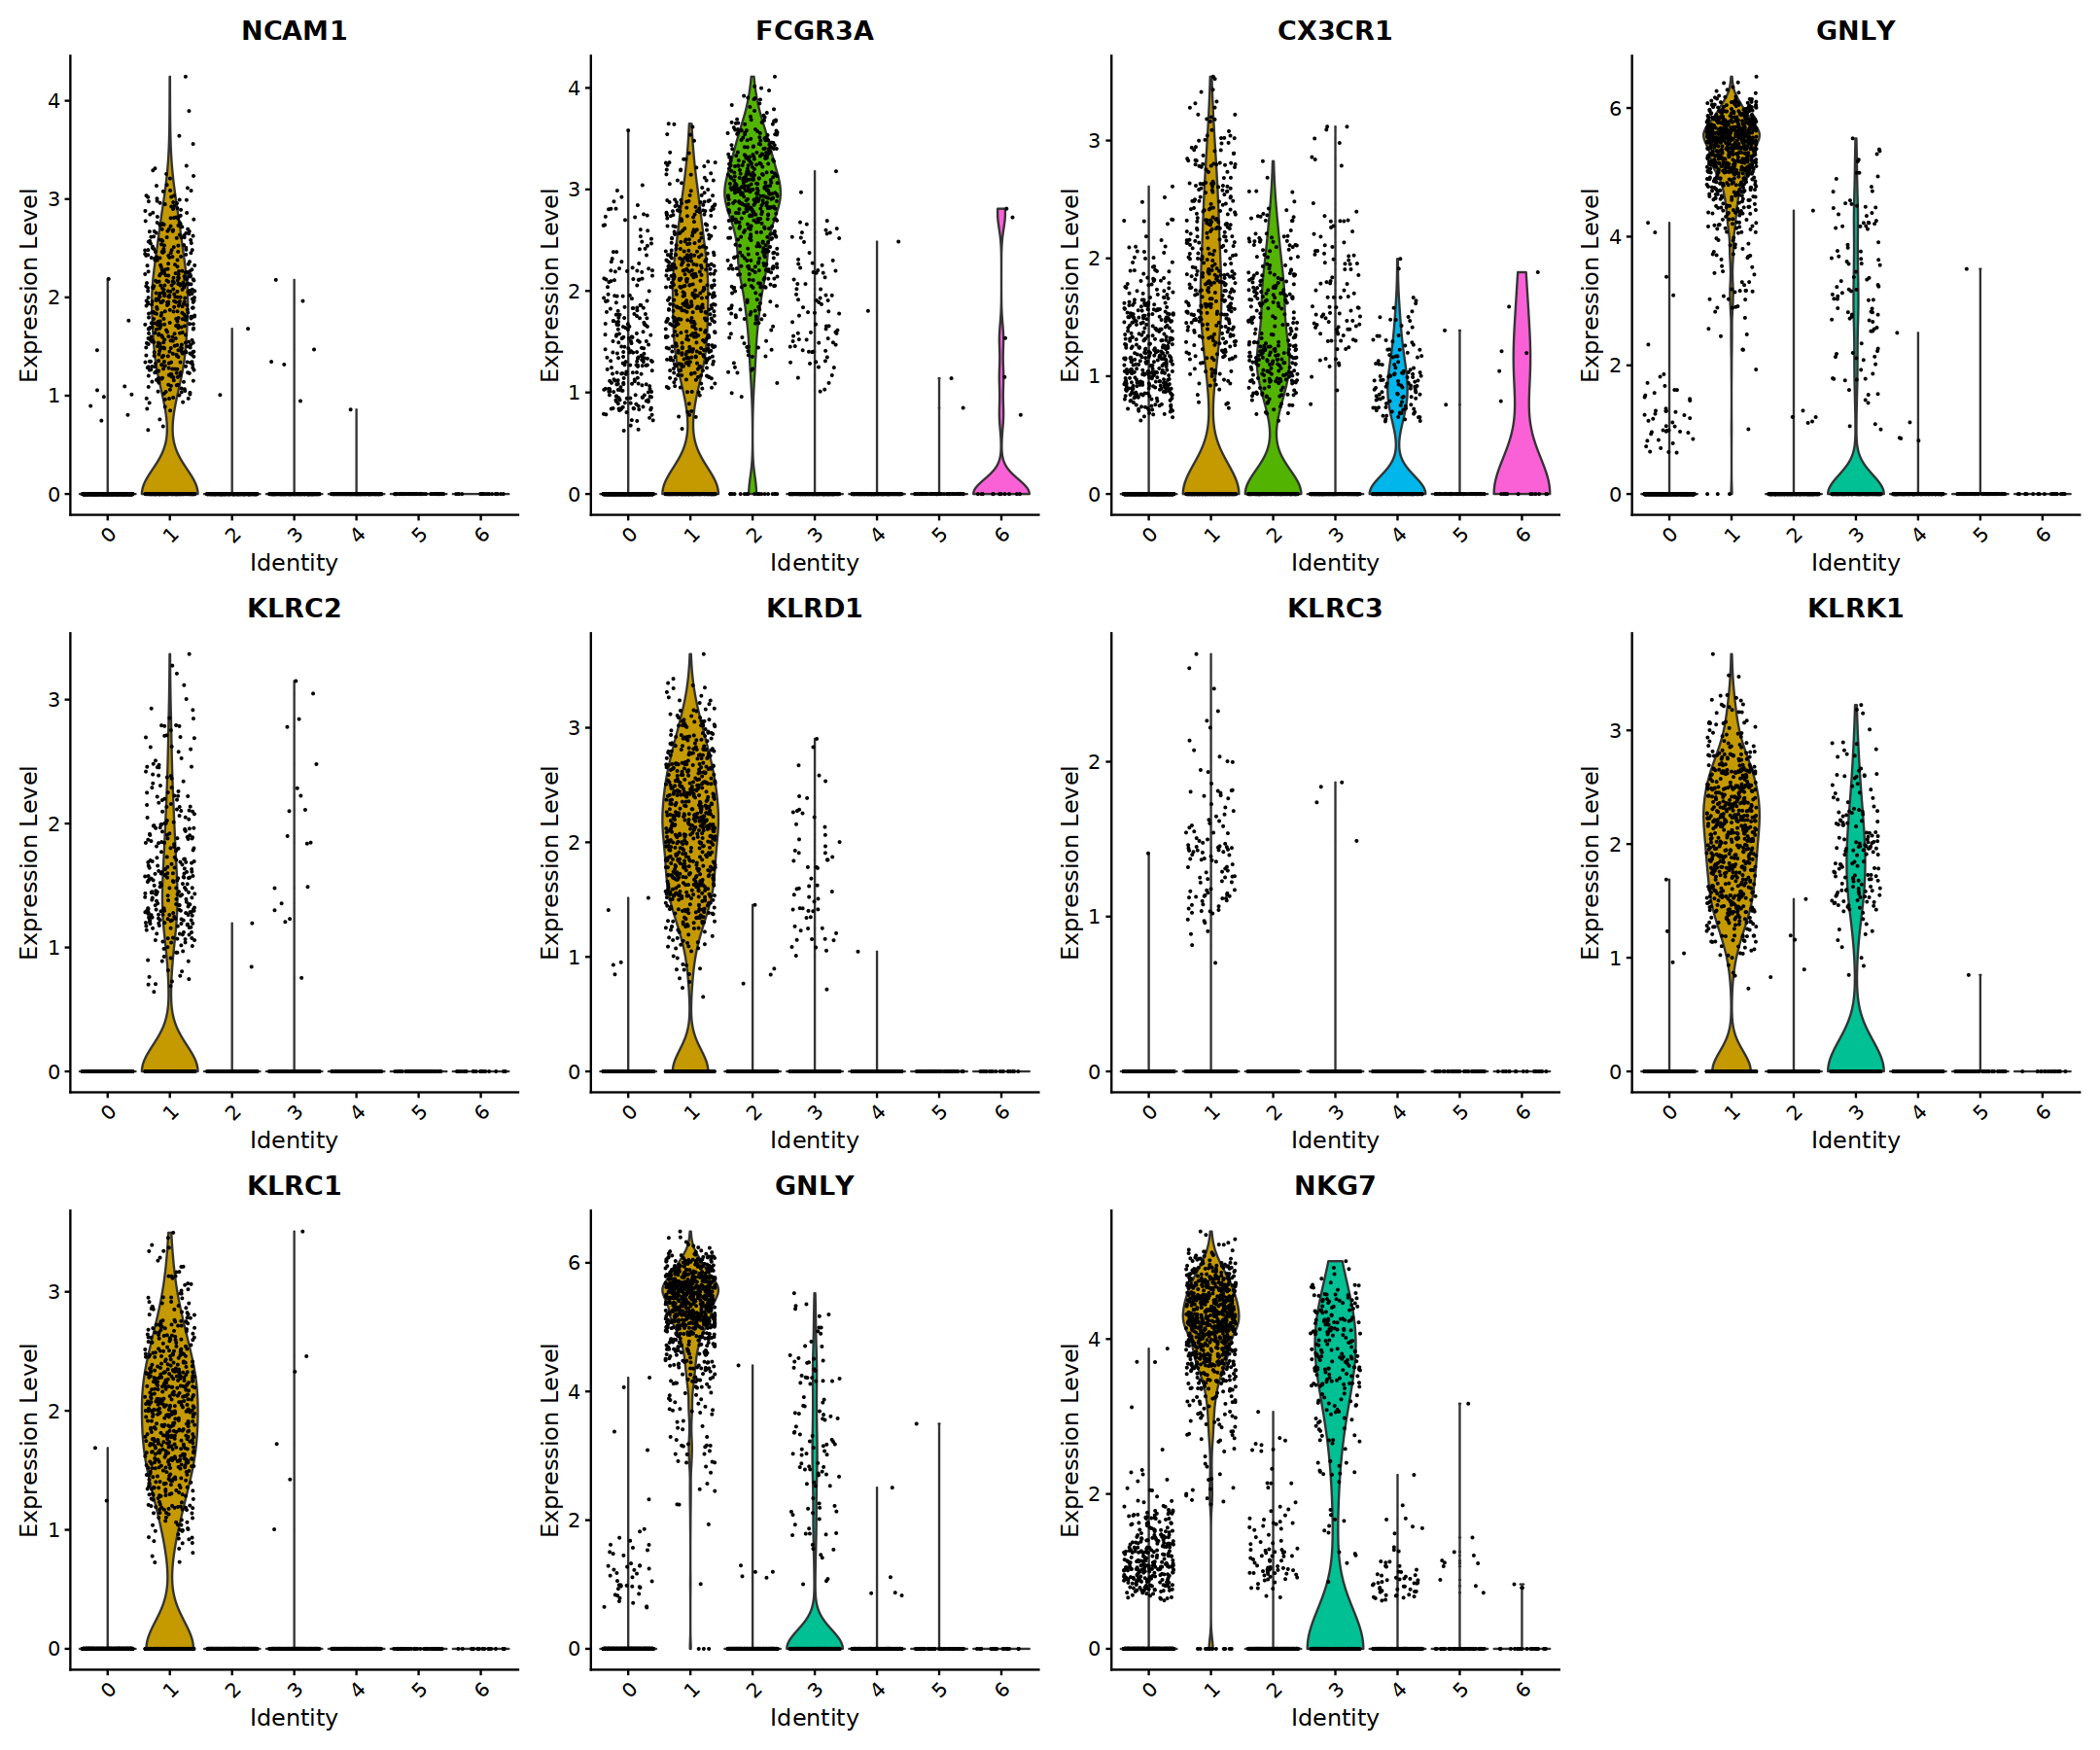

In [11]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

#### B-cells

In [12]:
markers = c("CD19","MS4A1","CCR7", "SELL","ITGAX", "CD79A","CD79B","JCHAIN","IGHA1")

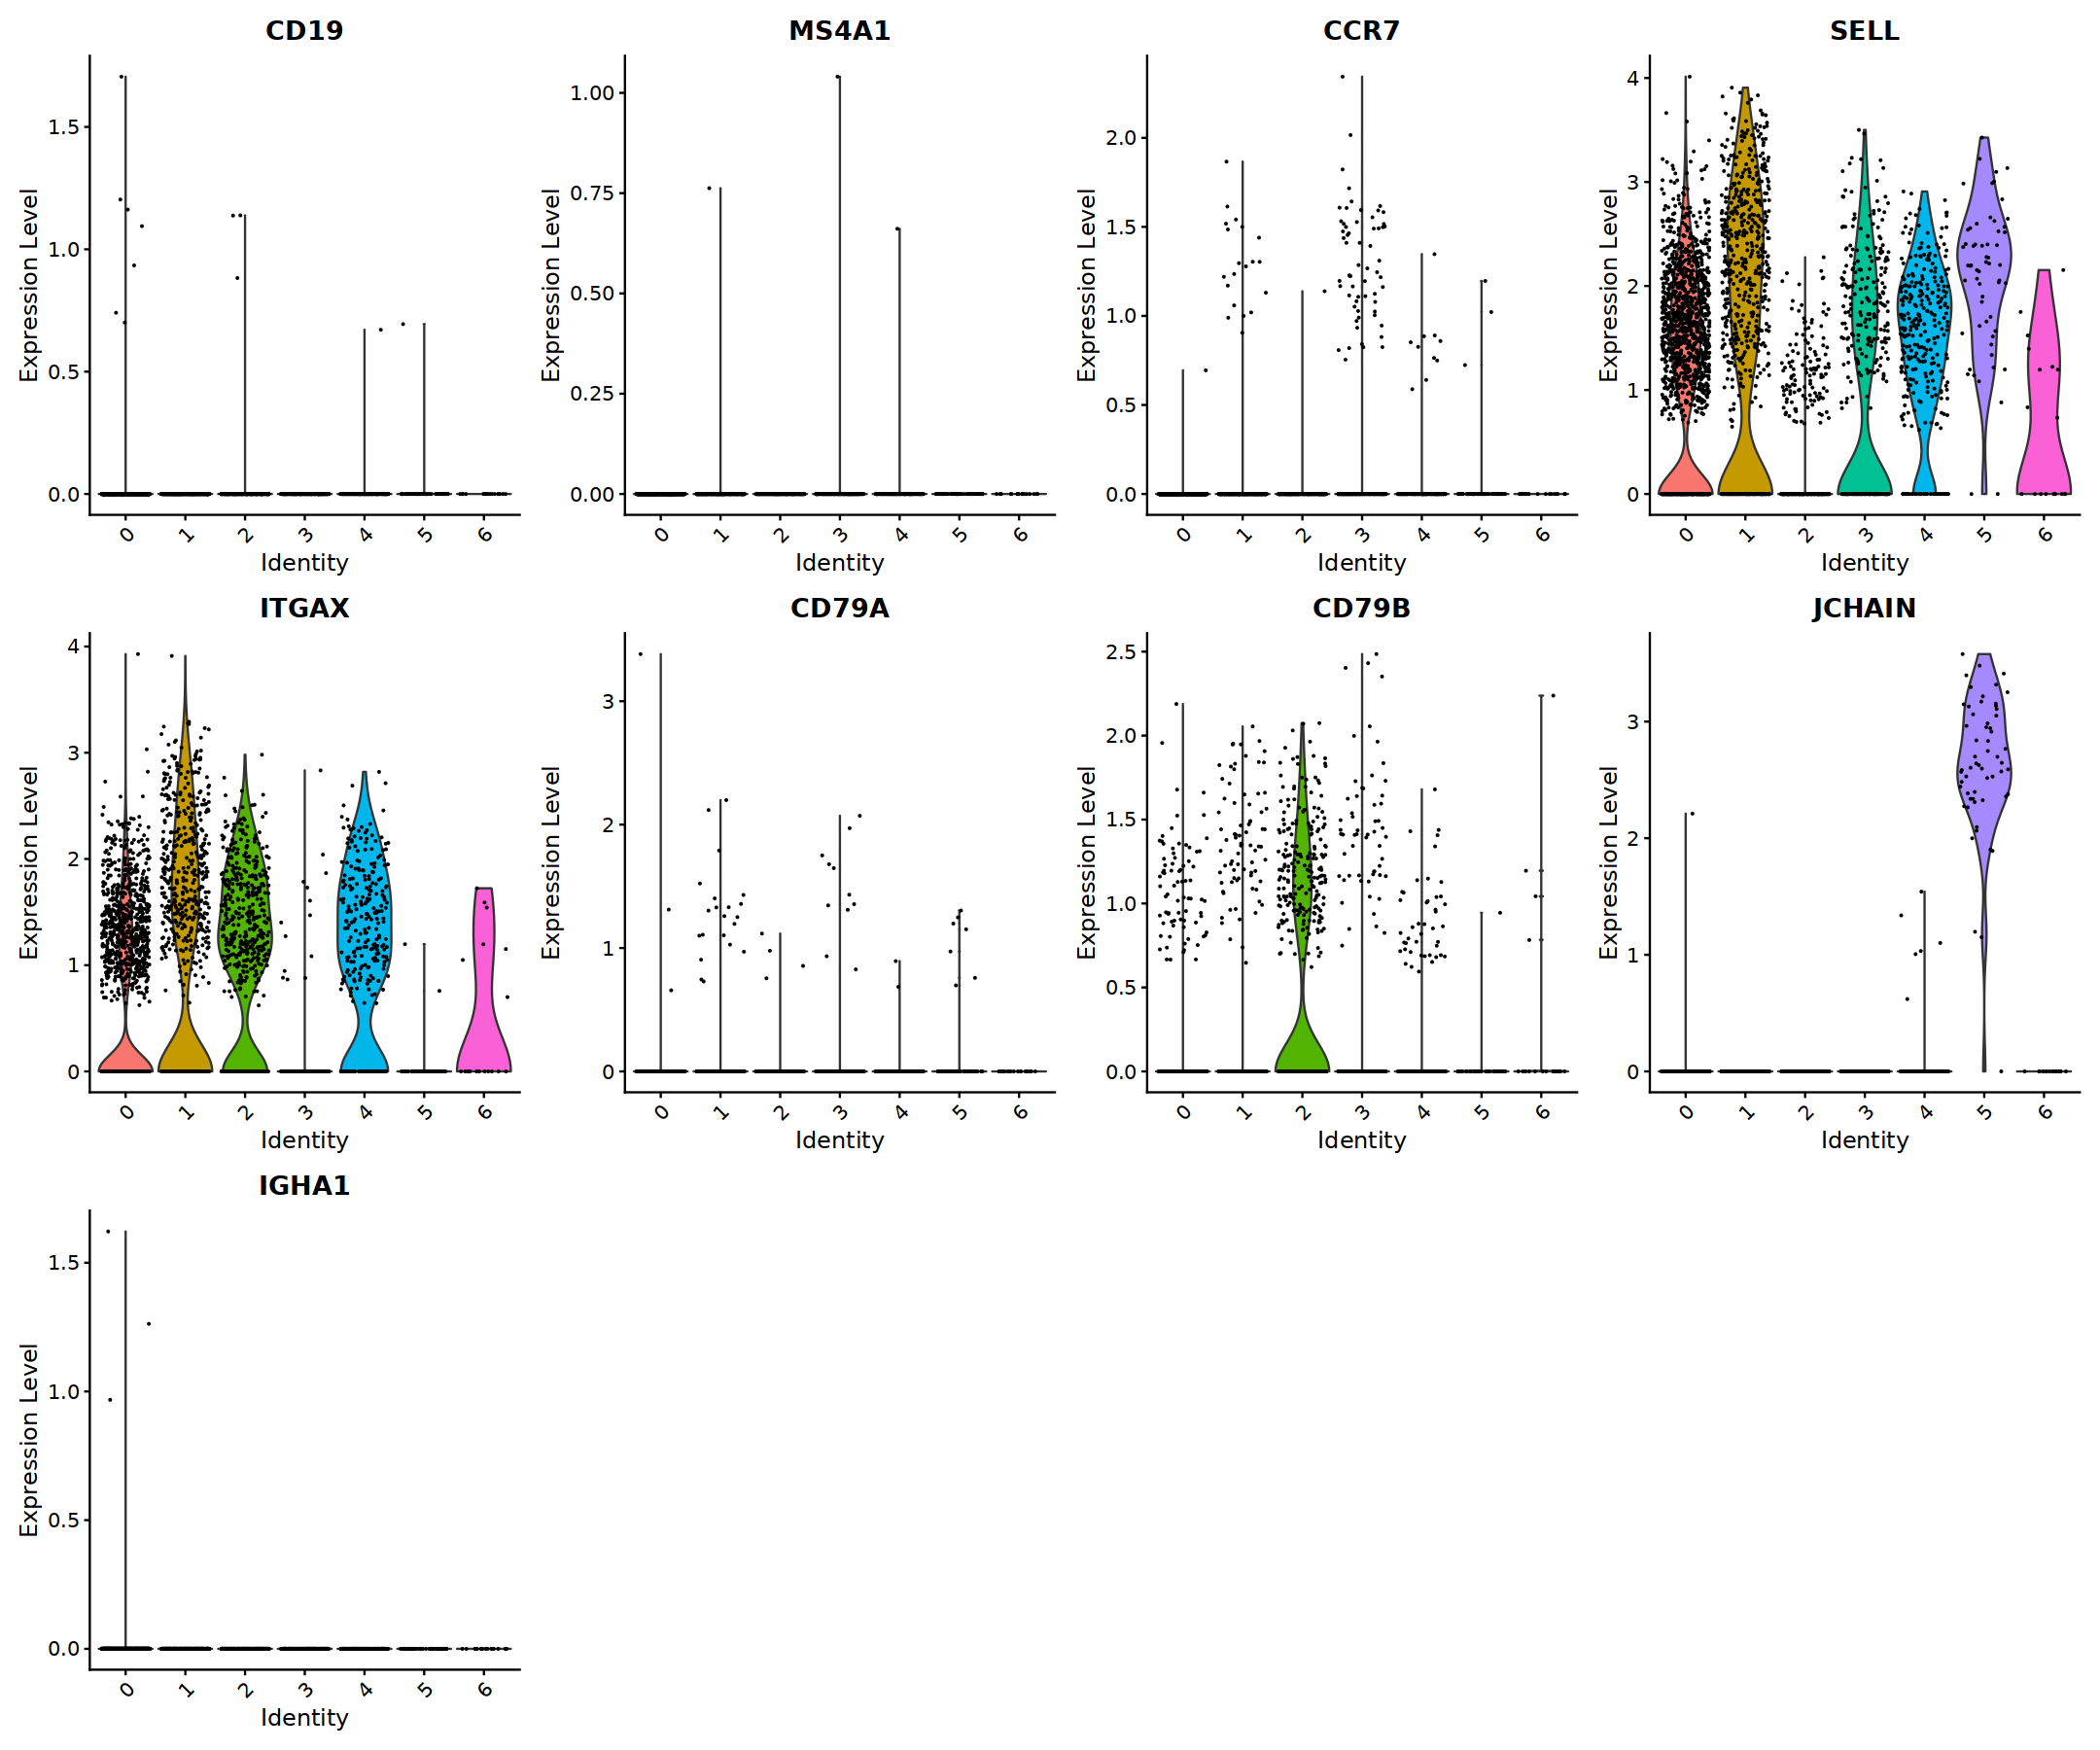

In [13]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

#### Monocytes 

In [14]:
markers = c("CD14", "S100A8", "S100A9", "LYZ", "VCAN", "FCN1","FCGR3A", "CX3CR1", "HLA-DRB1", "HLA-DRA")

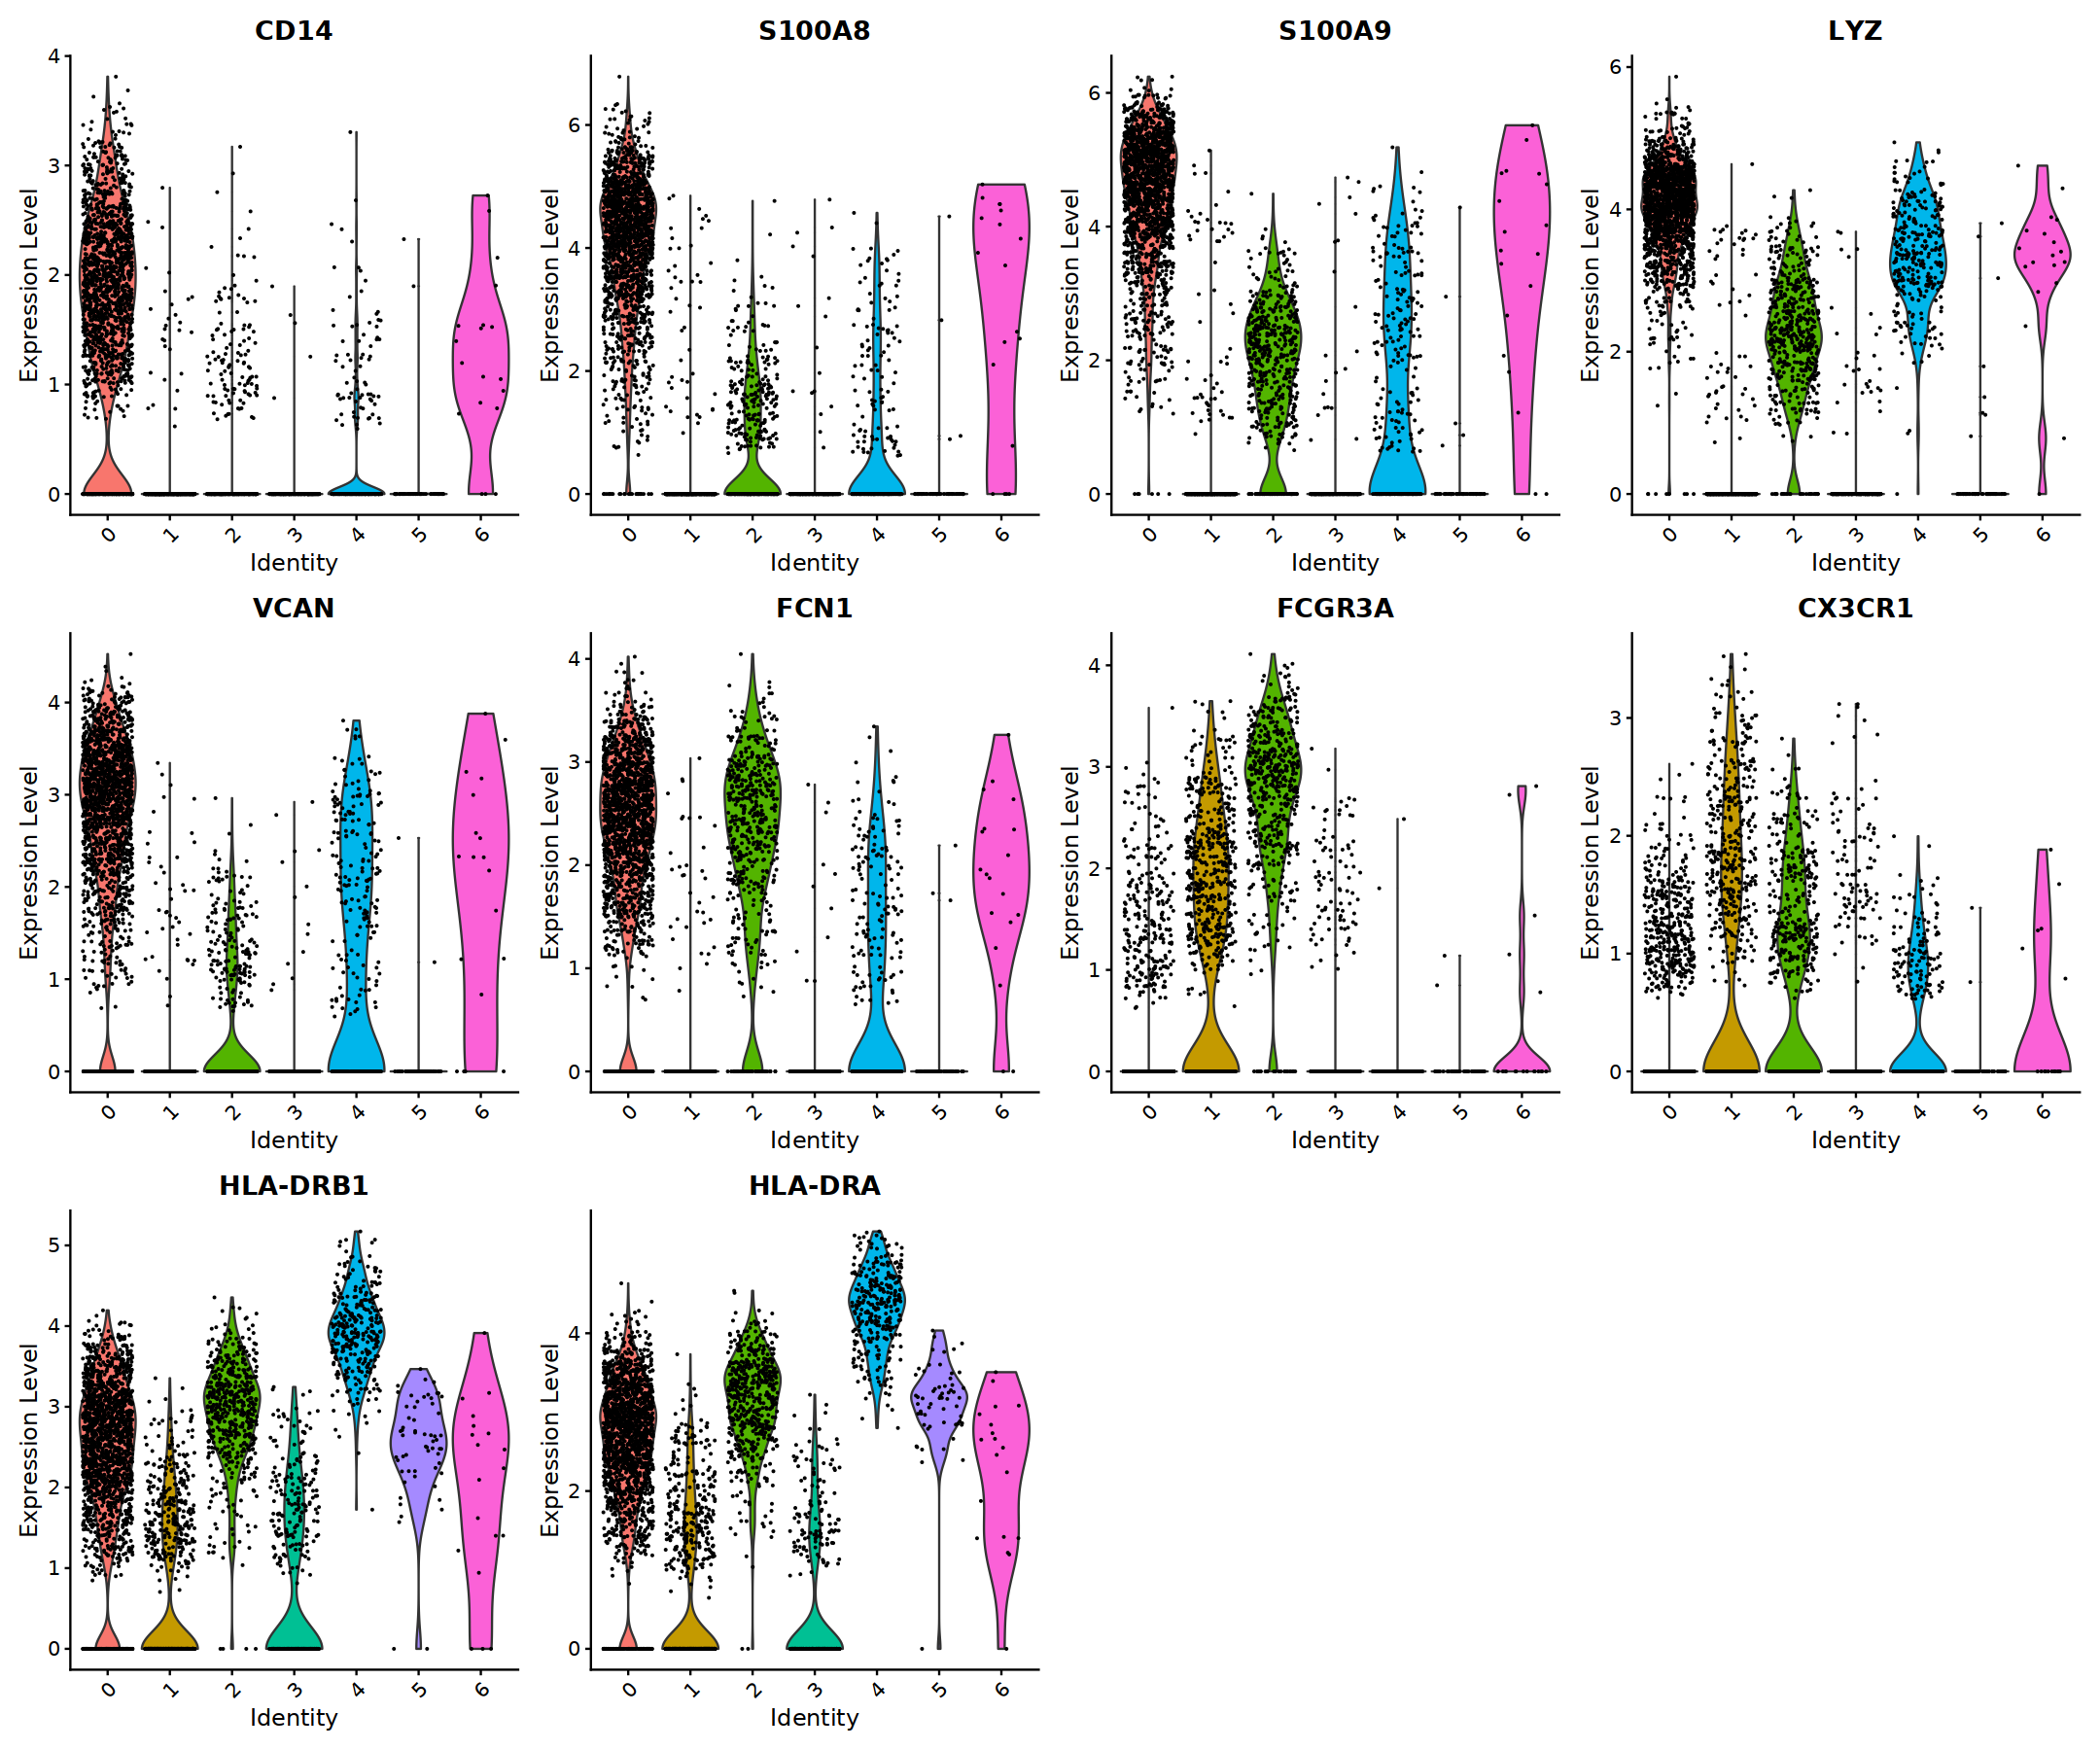

In [15]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

#### Dendritic cells

In [16]:
markers = c("CLEC9A", "XCR1", "IDO1","FCER1A", "CLEC10A",
            "ITGAX","SIGLEC6","IL3RA","JCHAIN")

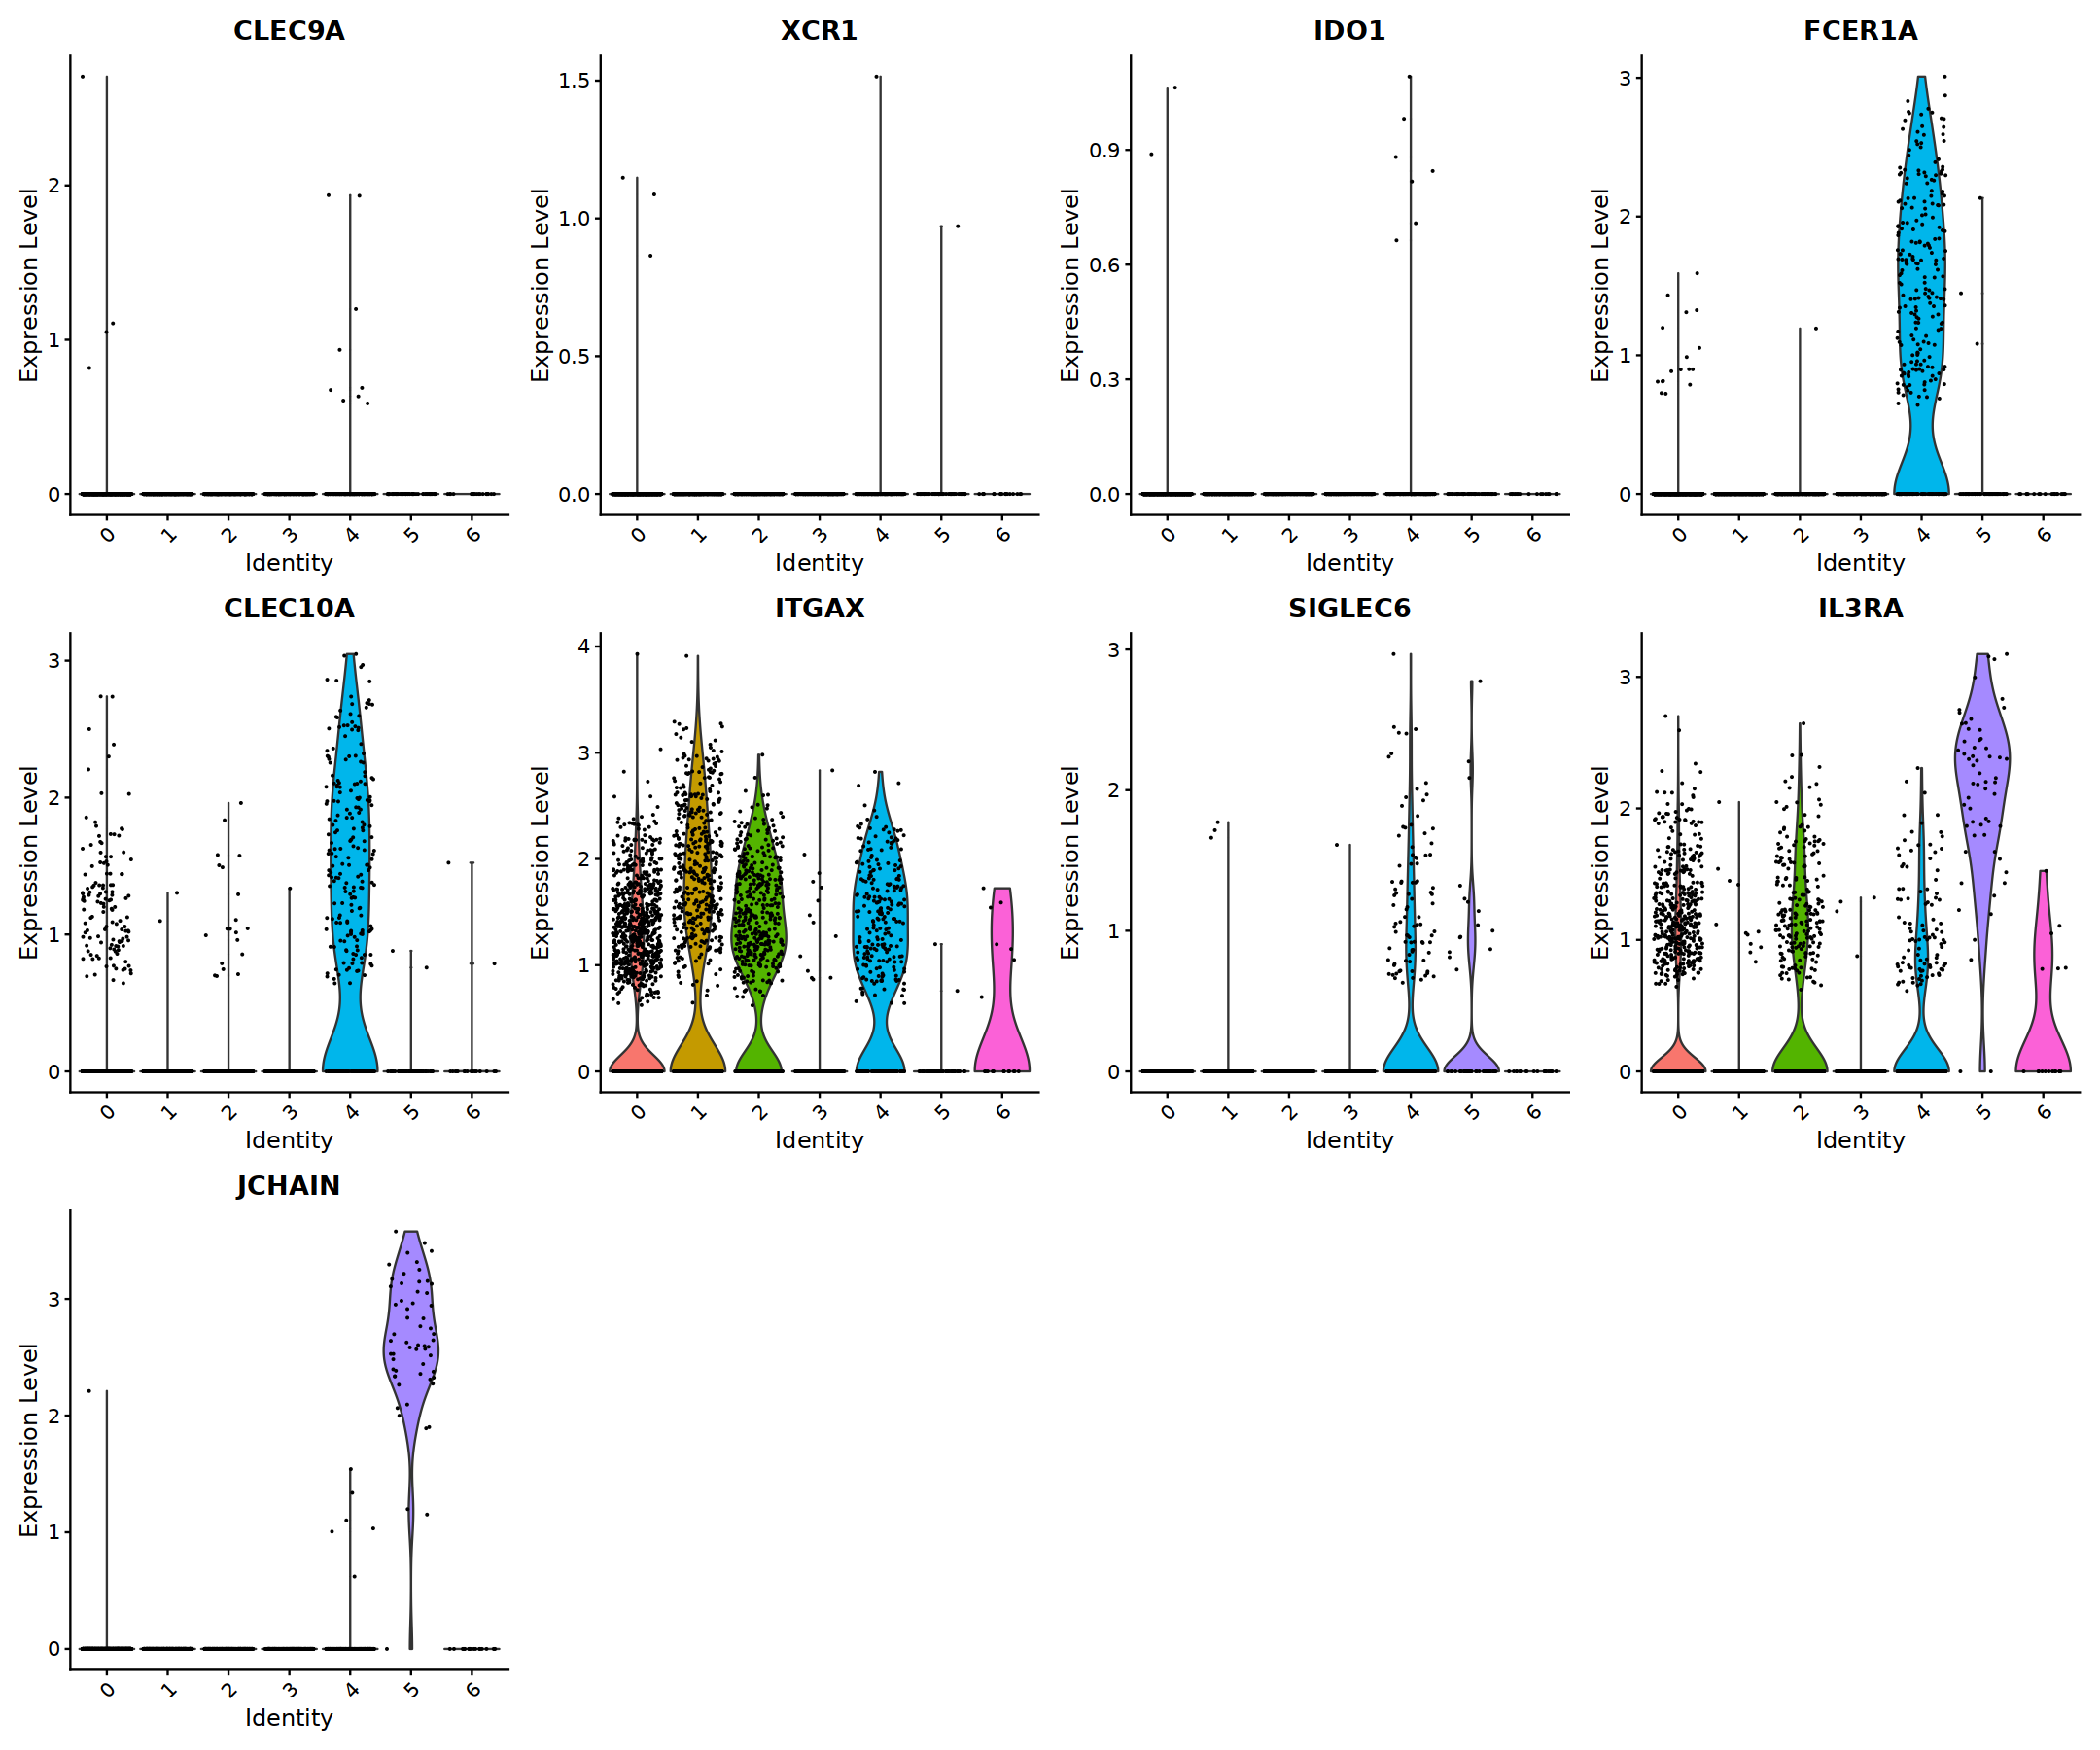

In [17]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,features=markers, ncol=4)

In [18]:
c <- 4
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC))

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2.227682e-161,3.4620445,0.987,0.314,5.124336e-157,4,HLA-DQA1
6.999608e-179,2.8608335,0.746,0.022,1.610120e-174,4,CD1C
7.356874e-140,2.6675331,1.000,0.665,1.692302e-135,4,HLA-DPB1
5.931737e-134,2.6143145,1.000,0.699,1.364477e-129,4,HLA-DPA1
2.448691e-142,2.5732012,1.000,0.749,5.632724e-138,4,HLA-DRA
4.551248e-146,2.3193453,1.000,0.982,1.046924e-141,4,CD74
4.140498e-129,2.2678496,0.997,0.581,9.524388e-125,4,HLA-DRB5
6.594829e-133,2.2282213,1.000,0.760,1.517008e-128,4,HLA-DRB1
1.369121e-118,2.2225435,0.993,0.649,3.149390e-114,4,HLA-DQB1


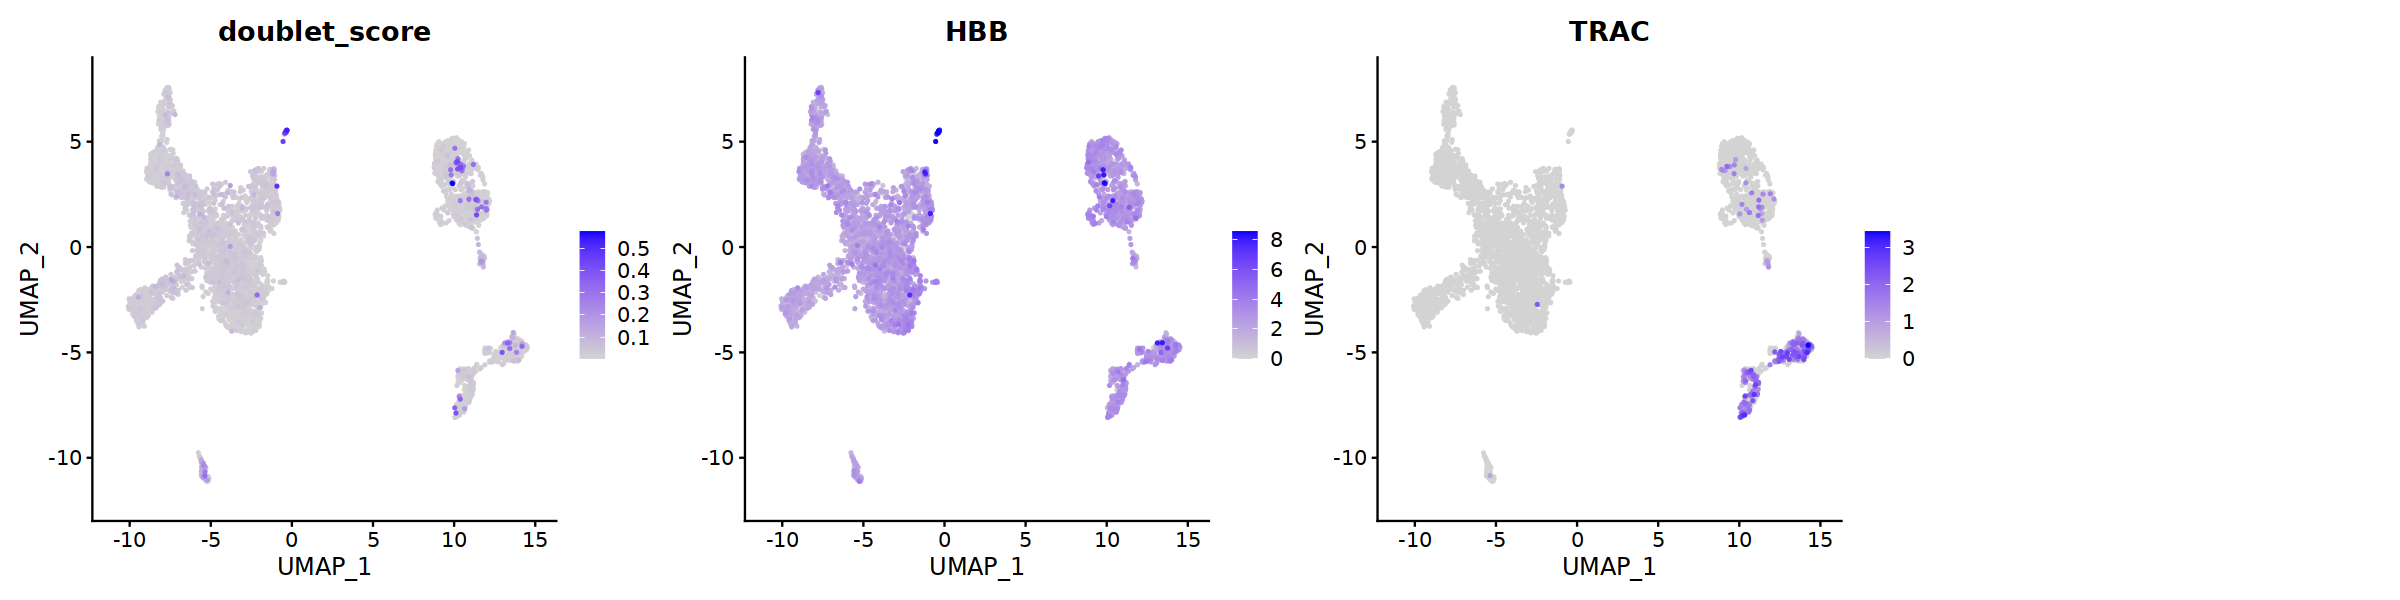

In [19]:
options(repr.plot.width = 20, repr.plot.height = 5, warn=-1,verbose = FALSE)
FeaturePlot(seurat_obj, reduction = "umap", 
            features=c("doublet_score","HBG2", "HBB", "TRAC"), 
            order = TRUE, ncol=4)

## Renaming

In [20]:
rename_clusters= list("0"="Monocytes",
                      "1"="NK",
                      "2"="Monocytes non-classical", 
                      "3"="T-cells", 
                      "4"="Dendritic cells",
                      "5"="Mast cells",
                      "6"="Erythocytes")
seurat_obj <- RenameIdents(object = seurat_obj, rename_clusters)
seurat_obj$l1_annot <- Idents(seurat_obj)

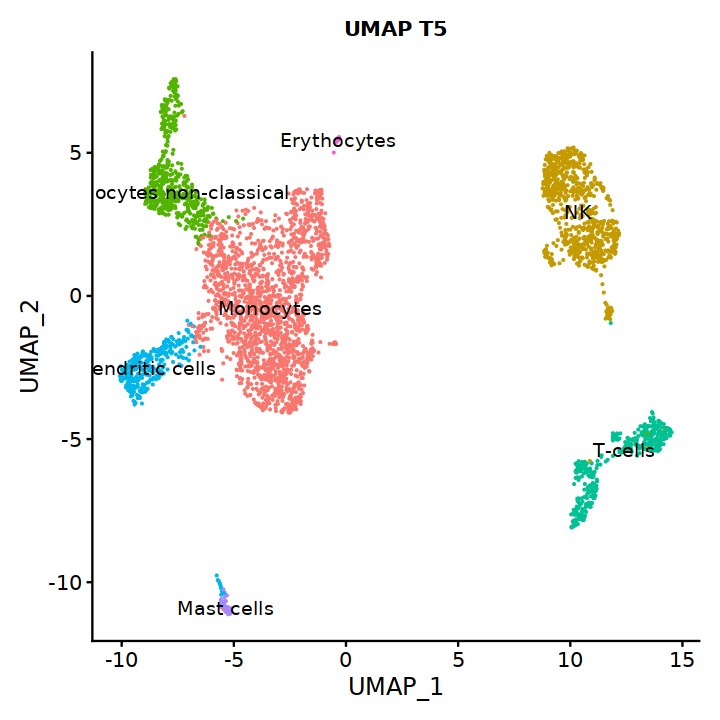

In [21]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label = T
) + NoLegend() + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## Save

In [22]:
saveRDS(seurat_obj, here::here(glue::glue("{annot}/{robj_dir}/4.0-l1_all_{timepoint}.rds")))

## Session Info

In [23]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3    forcats_1.0.0      stringr_1.5.0      dplyr_1.1.3       
 [5] purrr_1.0.2        readr_2.1.4        tidyr_1.3.0        tibble_3.2.1      
 [9] ggplot2_3.4.4      tidyverse_2.0.0    glue_1.6.2         here_1.0.1        
[13] SeuratObject_4.1.4 Seurat_4.0.5  